## **To put it simply**, 
## **Dimensionality** is the number of dimensions, features, or variables associated with a 
## sample of data. Often, this can be thought of as a number of columns in a dataframe, 
## where each sample is on a new row, and each column describes some attribute of the 
## sample.


![table](https://media.geeksforgeeks.org/wp-content/uploads/20200710135837/Screenshot-9461.png)

## In this figure, we have eight samples of data, each with **four independent features or** 
## **dimensions**. Depending upon the problem being solved, or the origin of this dataset, we 
## may want to reduce the number of dimensions per sample without losing the provided 
## information. This is where dimensionality reduction can be helpful

# **Dimensionality reduction** helps counteract 
# —the curse of dimensionality—in which algorithms cannot effectively and efficiently train on the data because of the sheer size of the feature space

## **Dimensionality reduction algorithms project high-dimensional data to a low dimensional space, retaining as much of the salient information as possible while removing redundant information**

### **Once the data is in the low-dimensional space, machine learning algorithms are able to identify interesting patterns more effectively and efficiently because a lot of the noise has been reduced**



There are various branches of dimensionality reduction. 

# **Linear projection**: 

## Linearly projecting data from a high dimensional space to a low-dimensional space

Techniques include:
* ## Principal component analysis
 * Incremental PCA
 * Sparse PCA 

* ## Singular value decomposition 
* ## Random projection

 * Gaussian random projection
 * sparse random projection

# **Manifold learning**:

## It is referred to as nonlinear dimensionality reduction. This involves techniques such as 

Techniques include:

* ## Kernel PCA 
* ## Isomap
* ## Multidimensional scaling (MDS)
* ## Locally linear embedding (LLE)
* ## t-distributed stochastic neighbor embedding (t-SNE)

# **Other Dimensionality Reduction Methods**:

## Do not rely on any sort of geometry or distance metric.

Techniques include:

* ## Dictionary learning
* ## Independent component analysis.


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os,time
import pickle,gzip

In [2]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import matplotlib as mpl
%matplotlib inline

In [3]:
#Data prep and Model Evaluation
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

## We will be using the MNIST dataset.

**Regrading the dataset:**

* Divided into three sets—a training set with 50,000 examples, a validation set with 10,000 examples, and a test set with 10,000 examples. We have labels for all the examples. 
* This dataset consists of 28x28 pixel images of handwritten digits. To make this simpler, we can flatten each array into a 28x28, or 784, dimensional vector. 
* Each component of the vector is a float between zero and one—representing the intensity of each pixel in the image. Zero stands for black; one stands for white. The labels are numbers between zero and nine, and indicate which digit the image represents.


In [5]:
import pandas as pd

train_set, validation_set, test_set = pd.read_pickle(r'../input/d/towhidultonmoy/mnist-pickle-dataset/mnist.pkl')

In [6]:
X_train,y_train=train_set[0],train_set[1]
X_validation,y_validation=validation_set[0],validation_set[1]
X_test,y_test=test_set[0],test_set[1]

In [7]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [8]:
#Creat Pandas DataFrames from the datasets
train_index=range(0,len(X_train))
validation_index=range(len(X_train),len(X_train)+len(X_validation))
test_index=range(len(X_train)+len(X_validation),len(X_train)+len(X_validation)+len(X_test))
X_train=pd.DataFrame(data=X_train,index=train_index)
y_train=pd.Series(data=y_train,index=train_index)

X_validation=pd.DataFrame(data=X_validation,index=validation_index)
y_validation=pd.Series(data=y_validation,index=validation_index)

X_test=pd.DataFrame(data=X_test,index=test_index)
y_test=pd.Series(data=y_test,index=test_index)

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Exploring the data
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [11]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

In [12]:
#Displaying the image
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()


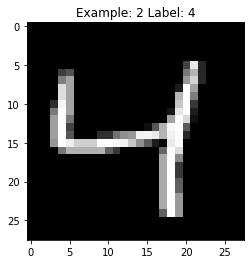

In [13]:
view_digit(2)

## **PCA**

### In PCA, the algorithm finds a **low-dimensional representation of the data while retaining as much of the variation (information) as possible**. 

* PCA does this by addressing the correlation among features. 
* If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. 
* The algorithm keeps performing this correlation eduction, finding the directions of maximum variance in the original high dimensional data and projecting them onto a smaller dimensional space.  **These newly derived components are known as principal components.**

### It is essential to **perform feature scaling before running PCA**. PCA is very sensitive to the relative ranges of the original features.

#### However, for our MNIST digits dataset, the features are already scaled to a range of zero to one, so we can skip this step.

In [14]:
#Applying PCA
from sklearn.decomposition import PCA

n_components=784
whiten= False
random_state=2018

pca=PCA(n_components=n_components,whiten=whiten,random_state=random_state)

In [15]:
X_train_PCA=pca.fit_transform(X_train)
X_train_PCA=pd.DataFrame(data=X_train_PCA,index=train_index)
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.461509,-1.246863,0.046373,-2.151915,-0.247397,-0.925442,0.889334,0.507071,-1.541719,0.689375,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.777482e-05,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,3.921658,-1.251645,2.335511,-1.340503,-3.421529,-0.725585,-0.206393,-0.345275,0.134158,0.595472,...,-1.203361e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.518349e-08,3.769019e-06,-1.573079e-06,-4.472361e-07,6.322716e-07
2,-0.203722,1.547967,-0.980402,2.039090,-1.079776,0.112957,-3.312377,1.403172,-0.592958,-0.763868,...,-4.304122e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.889546e-07,4.892535e-07,-1.408936e-07,-4.001333e-07,3.503350e-08
3,-3.148399,-2.296112,1.091202,0.484562,0.066957,2.778971,-1.834340,-0.174675,1.166475,0.052839,...,4.880086e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.079462e-08,-1.054923e-06,-8.285233e-07,5.854197e-07,-4.053738e-07
4,-1.442683,2.872046,0.175519,-0.977003,0.302768,0.120649,-0.376714,-1.478076,1.003848,0.540815,...,2.053310e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.435548e-08,3.153765e-06,6.977519e-07,1.956688e-06,-8.789518e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.147862,-1.973070,-3.739088,1.209615,-0.312010,-0.893621,1.491427,0.013880,-0.385601,-2.202874,...,-6.914077e-09,7.816167e-09,-8.783386e-09,2.977693e-10,-8.963874e-10,1.775950e-08,8.707629e-09,-9.605307e-09,2.269097e-11,3.664860e-09
49996,1.416360,-0.252645,-0.809302,-0.523400,-3.905707,0.188046,-0.449585,-1.231883,-0.104545,0.510874,...,4.419767e-08,-4.215444e-09,-6.393595e-09,-3.607545e-09,-1.449123e-09,-1.461915e-08,-3.031179e-09,5.248367e-09,-5.335396e-09,3.921431e-10
49997,-1.425061,-1.957856,-2.551206,0.094615,0.654076,-0.603853,0.312822,-0.047627,0.994543,0.222396,...,5.489530e-09,4.009260e-09,6.008996e-09,-4.901973e-09,-2.664599e-09,6.732581e-09,-1.160591e-08,1.650248e-09,7.759243e-09,-8.707145e-11
49998,-1.507430,1.025312,0.107809,0.275914,2.285608,-0.590753,-0.676785,-0.062387,0.050033,1.578294,...,-4.321601e-09,3.901234e-09,-4.949876e-09,-1.228379e-09,-2.119012e-10,4.652321e-09,2.463394e-09,-4.194926e-09,4.157781e-09,-4.896524e-10


In [16]:
#Percenatage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principle components: ",sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principle components:  0.9999999550829073


In [17]:
#Percenatage of Variance Captured by X principal components
importanceOfPrincipalComponents= pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents=importanceOfPrincipalComponents.T
importanceOfPrincipalComponents

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.097444,0.070598,0.062161,0.053795,0.048581,0.043196,0.032776,0.028864,0.027688,0.023659,...,1.254956e-16,1.254956e-16,1.254956e-16,1.254956e-16,1.254956e-16,1.229925e-16,1.199071e-16,6.439675e-17,2.590294e-17,1.362777e-17


In [18]:
print("Variance Captured by First 10 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print("Variance Captured by First 20 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print("Variance Captured by First 50 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print("Variance Captured by First 100 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print("Variance Captured by First 200 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print("Variance Captured by First 300 Principal Components: ",importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876232]
Variance Captured by First 20 Principal Components:  [0.64398026]
Variance Captured by First 50 Principal Components:  [0.8248609]
Variance Captured by First 100 Principal Components:  [0.91465855]
Variance Captured by First 200 Principal Components:  [0.96650076]
Variance Captured by First 300 Principal Components:  [0.98624885]


<AxesSubplot:>

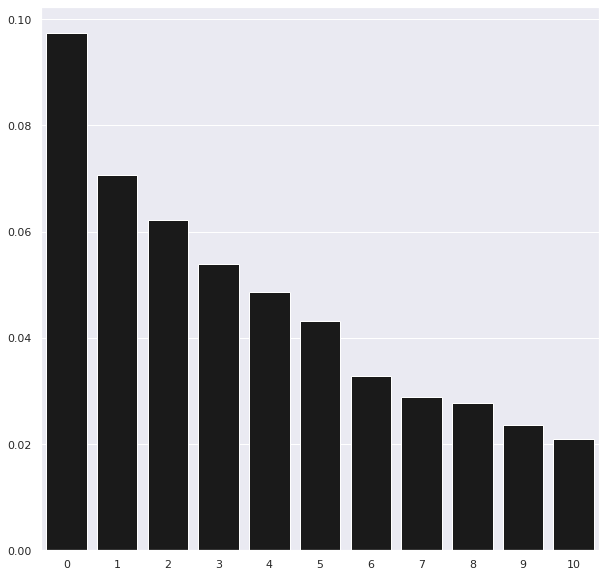

In [19]:
# View percentage captured by first X components
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:10],color='k')

In [20]:
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.461509,-1.246863,0.046373,-2.151915,-0.247397,-0.925442,0.889334,0.507071,-1.541719,0.689375,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.777482e-05,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,3.921658,-1.251645,2.335511,-1.340503,-3.421529,-0.725585,-0.206393,-0.345275,0.134158,0.595472,...,-1.203361e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.518349e-08,3.769019e-06,-1.573079e-06,-4.472361e-07,6.322716e-07
2,-0.203722,1.547967,-0.980402,2.039090,-1.079776,0.112957,-3.312377,1.403172,-0.592958,-0.763868,...,-4.304122e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.889546e-07,4.892535e-07,-1.408936e-07,-4.001333e-07,3.503350e-08
3,-3.148399,-2.296112,1.091202,0.484562,0.066957,2.778971,-1.834340,-0.174675,1.166475,0.052839,...,4.880086e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.079462e-08,-1.054923e-06,-8.285233e-07,5.854197e-07,-4.053738e-07
4,-1.442683,2.872046,0.175519,-0.977003,0.302768,0.120649,-0.376714,-1.478076,1.003848,0.540815,...,2.053310e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.435548e-08,3.153765e-06,6.977519e-07,1.956688e-06,-8.789518e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.147862,-1.973070,-3.739088,1.209615,-0.312010,-0.893621,1.491427,0.013880,-0.385601,-2.202874,...,-6.914077e-09,7.816167e-09,-8.783386e-09,2.977693e-10,-8.963874e-10,1.775950e-08,8.707629e-09,-9.605307e-09,2.269097e-11,3.664860e-09
49996,1.416360,-0.252645,-0.809302,-0.523400,-3.905707,0.188046,-0.449585,-1.231883,-0.104545,0.510874,...,4.419767e-08,-4.215444e-09,-6.393595e-09,-3.607545e-09,-1.449123e-09,-1.461915e-08,-3.031179e-09,5.248367e-09,-5.335396e-09,3.921431e-10
49997,-1.425061,-1.957856,-2.551206,0.094615,0.654076,-0.603853,0.312822,-0.047627,0.994543,0.222396,...,5.489530e-09,4.009260e-09,6.008996e-09,-4.901973e-09,-2.664599e-09,6.732581e-09,-1.160591e-08,1.650248e-09,7.759243e-09,-8.707145e-11
49998,-1.507430,1.025312,0.107809,0.275914,2.285608,-0.590753,-0.676785,-0.062387,0.050033,1.578294,...,-4.321601e-09,3.901234e-09,-4.949876e-09,-1.228379e-09,-2.119012e-10,4.652321e-09,2.463394e-09,-4.194926e-09,4.157781e-09,-4.896524e-10


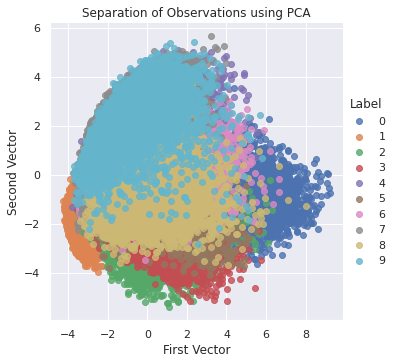

In [21]:
def scatterPlot(xDF,yDF,algoName):
    tempDF=pd.DataFrame(data=xDF.loc[:,0:1],index=xDF.index)
    tempDF=pd.concat((tempDF,yDF),axis=1,join="inner")
    tempDF.columns=["First Vector","Second Vector","Label"]
    sns.lmplot(x="First Vector",y="Second Vector",hue="Label",data=tempDF,fit_reg=False)
    ax=plt.gca()
    ax.set_title("Separation of Observations using " +algoName)
scatterPlot(X_train_PCA,y_train,"PCA")

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

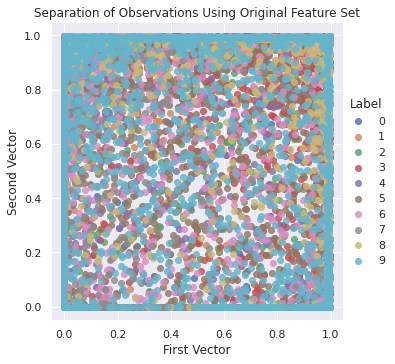

In [22]:
# View two random dimensions
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

# **Incremental PCA**

### For **datasets that are very large and cannot fit in memory** , we can perform **PCA incrementally in small batches** , where each batch is able to fit in memory. The batch size can be either set manually or determined automatically. This batchbased form of PCA is known as incremental PCA. The resulting principal components of PCA and incremental PCA are generally pretty similar

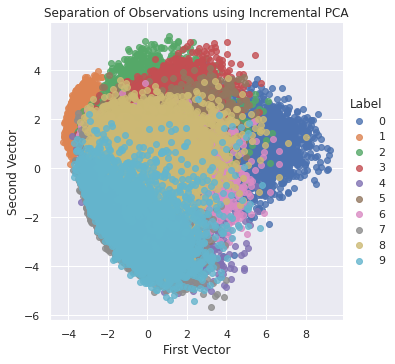

In [23]:
from sklearn.decomposition import IncrementalPCA

n_components=784
batch_size=None

incrementalPCA=IncrementalPCA(n_components=n_components,batch_size=batch_size)

X_train_incrementalPCA=incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA=pd.DataFrame(data=X_train_incrementalPCA,index=train_index)

X_validation_incrementalPCA=incrementalPCA.fit_transform(X_validation)
X_validation_incrementalPCA=pd.DataFrame(data=X_validation_incrementalPCA,index=validation_index)

scatterPlot(X_train_incrementalPCA,y_train,"Incremental PCA")

# **Sparse PCA**

# First, clarify what is **sparsity**,

## A matrix in which most entries are **0** is called a **sparse matrix**. These matrices can be stored more efficiently and certain computations can be carried out more efficiently on them provided the matrix is sufficiently large and sparse. Neural networks can leverage the efficiency gained from sparsity by assuming most connection weights are equal to 0.

## **The goal is to reduce the mounds of matrix multiplication deep learning requires**, shortening the time to good results. 


### The normal PCA algorithm 
* searches for linear combinations in all the input variables, reducing the original feature space as densely as possible. 
* But for some machine learning problems, some degree of **sparsity** may be preferred. 
* A version of PCA that retains some degree of sparsity—controlled by a hyperparameter called alpha—is known as sparse PCA. 
* The sparse PCA algorithm searches for linear combinations in just some of the input variables, reducing the original feature space to some degree but not as compactly as normal PCA.

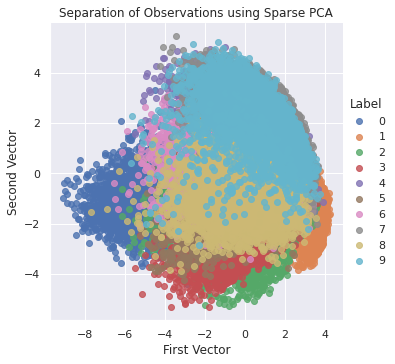

In [24]:
from sklearn.decomposition import SparsePCA
n_components=100
alpha=0.0001
random_state=2018
n_jobs=-1

sparsePCA=SparsePCA(n_components=n_components,alpha=alpha,random_state=random_state,n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])  #Because this algorithm trains a bit more slowly than normal PCA, we will train on just the first 10,000 examples in our training set
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)
X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)
scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")


# **Kernel PCA**

### **Normal PCA, incremental PCA, and sparse PCA linearly project the original data onto a lower dimensional space**, but there is also a **nonlinear form of PCA** known as kernel PCA, which runs a similarity function over pairs of original data points in order to perform nonlinear dimensionality reduction.

### For the kernel PCA algorithm, we need to set the number of components we desire, the type of kernel, and the kernel coefficient, which is known as the **gamma**

* Kernel is used as a measure of similarity. In particular, the kernel function k(x,.) defines the distribution of similarities of points around a given point x. k(x,y) denotes the similarity of point x with another given point y.

* In machine learning "kernel" is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem "by mapping the original non-linear observations into a higher-dimensional space".


In [25]:
from sklearn.decomposition import KernelPCA
n_components=100
kernel="rbf"
gamma=None
random_state=2018
n_jobs=1

kernelPCA=KernelPCA(n_components=n_components, kernel=kernel, \
gamma=gamma, n_jobs=n_jobs, random_state=random_state)

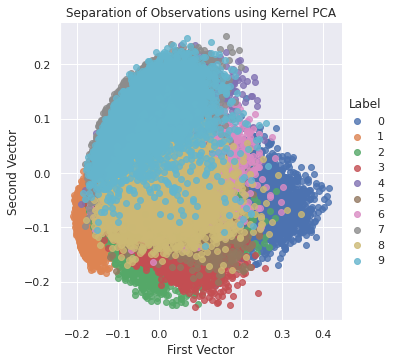

In [26]:
kernelPCA.fit(X_train.loc[:10000,:])  #Because this algorithm trains a bit more slowly than normal PCA, we will train on just the first 10,000 examples in our training set
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)
X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)
scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

# **Singular Value Decomposition**

### Another approach to learning the underlying structure of the data is to **reduce the rank of the original matrix** of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in the smaller rank matrix. This is known as singular value decomposition (SVD).

### **The maximum number of its linearly independent columns (or rows ) of a matrix is called the rank of a matrix. The rank of a matrix cannot exceed the number of its rows or columns**


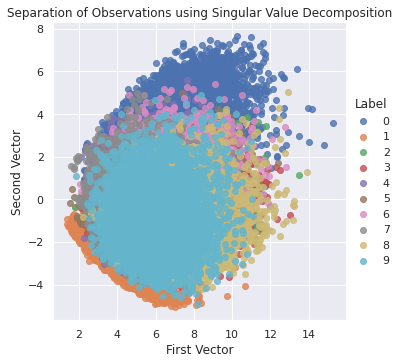

In [27]:
from sklearn.decomposition import TruncatedSVD
n_components=200
algorithm="randomized"
n_iter=5
random_state=2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
n_iter=n_iter, random_state=random_state)
X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)
X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)
scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

# **Random projection**

### Another linear dimensionality reduction technique is random projection, which relies on the **Johnson–Lindenstrauss lemma**. According to the **Johnson–Lindenstrauss lemma**, points in a high-dimensional space can be embedded into a much lower-dimensional space so that distances between the points are nearly preserved. 

## **Gaussian Random Projection**

### For Gaussian random projection, we can either specify the number of components we would like to have in the reduced feature space, or we can set the hyperparameter **eps**. The **eps** controls the quality of the embedding according to the Johnson–Lindenstrauss lemma, where smaller values generate a higher number of dimensions. 

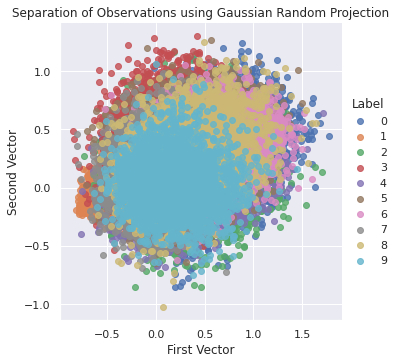

In [28]:
#Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components="auto"
eps=0.5
random_state=2018

GRP= GaussianRandomProjection(n_components=n_components, eps=eps, \
random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)
X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)
scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

## **Sparse Random Projection**


### Just as there is a sparse version of PCA, there is a sparse version of random projection known as sparse random projection

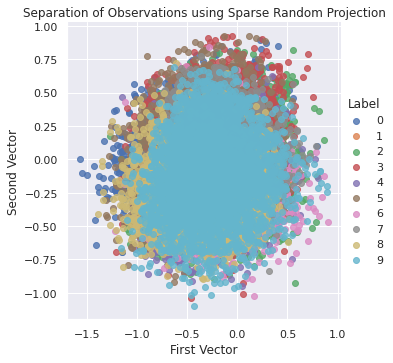

In [29]:
from sklearn.random_projection import SparseRandomProjection
n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018
SRP = SparseRandomProjection(n_components=n_components, \
density=density, eps=eps, dense_output=dense_output, \
random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)
X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)
scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

# **Isomap**

### It learns a new, low-dimensional embedding of the original feature set by calculating the pairwise distances of all the points, where distance is curved or geodesic distance rather than Euclidean distance. 

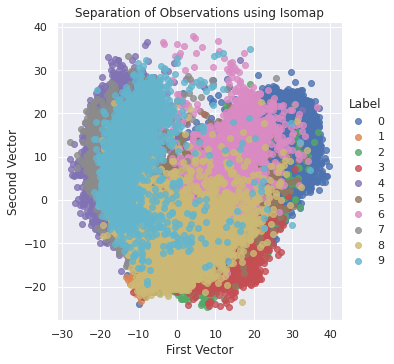

In [30]:
# Isomap
from sklearn.manifold import Isomap
n_neighbors = 5
n_components = 10
n_jobs = 4
isomap = Isomap(n_neighbors=n_neighbors, \
n_components=n_components, n_jobs=n_jobs)
isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)
X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
index=validation_index)
scatterPlot(X_train_isomap, y_train, "Isomap")

# **Multidimensional Scaling**

### Multidimensional scaling (MDS) is a form of **nonlinear dimensionality reduction** that learns the similarity of points in the original dataset and, using this similarity learning, models this in a lower dimensional space

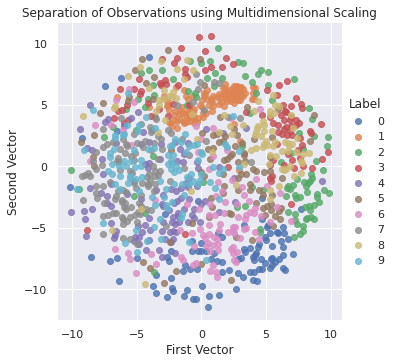

In [31]:
# Multidimensional Scaling
from sklearn.manifold import MDS
n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018
mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
metric=metric, n_jobs=n_jobs, random_state=random_state)
X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])
scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")


# **Locally Linear Embedding (LLE)**

### Another popular **nonlinear dimensionality reduction** method is called locally linear embedding (LLE). This method preserves distances within local neighborhoods as it projects the data from the original feature space to a reduced space. LLE discovers the nonlinear structure in the original, high-dimensional data by segmenting the data into smaller components and modeling each component as a linear embedding.


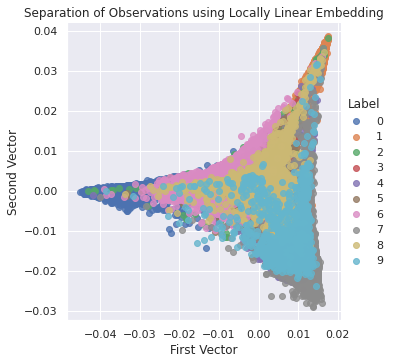

In [32]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding
n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
n_components=n_components, method=method, \
random_state=random_state, n_jobs=n_jobs)
lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)
X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)
scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

# **t-SNE**

### t-distributed stochastic neighbor embedding (t-SNE) is a **nonlinear dimensionality reduction** technique. It does this by constructing **two probability distributions**, one over pairs of points in the high-dimensional space and another over pairs of points in the low-dimensional space such that similar points have a high probability and dissimilar points have a lower probability. Specifically, t-SNE minimizes the Kullback–Leibler divergence between the two probability distributions.

The **Kullback-Leibler Divergence score** , or KL divergence score, quantifies how much one probability distribution differs from another probability distribution.

### In real-world applications of t-SNE, it is best to use another dimensionality reduction technique (such as PCA, as we do here) to reduce the number of dimensions before applying t-SNE. By applying another form of dimensionality reduction first, we reduce the noise in the features that are fed into t-SNE and speed up the computation of the algorithm

### t-SNE has a nonconvex cost function, which means that different initializations of the algorithm will generate different results. There is no stable solution.

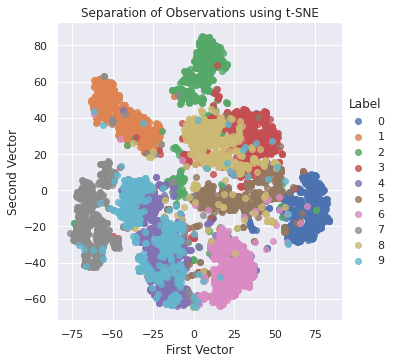

In [33]:
from sklearn.manifold import TSNE
n_components=2
learning_rate=300
perplexity=30
early_exaggeration=12
init="random"
random_state=2018

tSNE=TSNE(n_components=n_components,learning_rate=learning_rate,
         perplexity=perplexity,early_exaggeration=early_exaggeration,
         init=init,random_state=random_state)

X_train_tSNE=tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE=pd.DataFrame(data=X_train_tSNE,index=train_index[:5001])

scatterPlot(X_train_tSNE,y_train,"t-SNE")

# **Mini-batch dictionary learning**

### Dictionary learning learns the **sparse representation** of the original data. The resulting matrix is known as the dictionary, and the vectors in the dictionary are known as atoms. These atoms are simple, binary vectors, populated by zeros and ones. Each instance in the original data can be reconstructed as a weighted sum of these atoms.

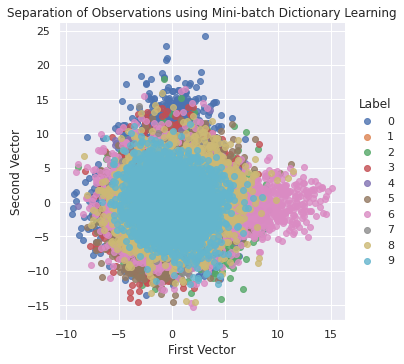

In [34]:
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components=50
alpha=1
batch_size=200
n_iter=25
random_state=2018

miniBatchDictLearning=MiniBatchDictionaryLearning( \
n_components=n_components, alpha=alpha, \
batch_size=batch_size, n_iter=n_iter, \
random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
data=X_train_miniBatchDictLearning, index=train_index)
X_validation_miniBatchDictLearning = \
miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
pd.DataFrame(data=X_validation_miniBatchDictLearning, \
index=validation_index)
scatterPlot(X_train_miniBatchDictLearning, y_train, \
"Mini-batch Dictionary Learning")

# **Independent Component Analysis**


### One common problem with unlabeled data is that there are many independent signals embedded together into the features we are given. Using independent component analysis (ICA), we can separate these blended signals into their individual components. After the separation is complete, we can reconstruct any of the original features by adding together some combination of the individual components we generate. ICA is commonly used in signal processing tasks (for example, to identify the individual voices in an audio clip of a busy coffeehouse)

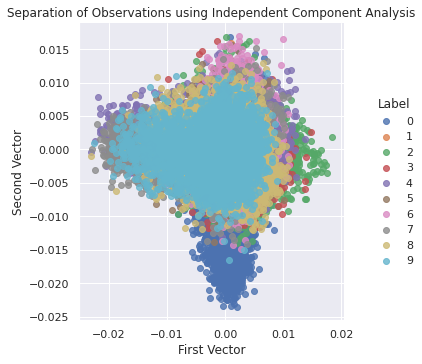

In [35]:
# Independent Component Analysis
from sklearn.decomposition import FastICA
n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018
fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
whiten=whiten, max_iter=max_iter, random_state=random_state)
X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)
X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
index=validation_index)
scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

# References:
* Ankur A. Patel - Hands-On Unsupervised Learning Using Python_ How to Build Applied Machine Learning Solutions from Unlabeled Data-O'Reilly Media (2019)
* Rowel Atienza - Advanced Deep Learning with TensorFlow 2 and Keras_ Apply DL, GANs, VAEs, deep RL, unsupervised learning, object detection and segmentation, and more, 2nd Edition
* Johnston, Benjamin_Jones, Aaron_Kruger, Christopher - Applied Unsupervised Learning with Python-Packt Publishing (2019)
* https://machinelearningmastery.com/divergence-between-probability-distributions/
* https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
* https://byjus.com/jee/rank-of-a-matrix-and-special-matrices/
* https://stats.stackexchange.com/questions/2499/what-is-a-kernel-in-plain-english
* https://stackoverflow.com/questions/41325673/what-does-sparse-mean-in-the-context-of-neural-nets

